**Import Libraries**

In [4]:
from tensorflow import keras      # print(keras.__version__, tf.__version__)
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, preprocessing

**Step 1. Load data**<br/>
[Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)

In [5]:
data = datasets.fetch_california_housing()
print(f"Data.keys: {data.keys()}")                                      # Information about dataset
print(f"\n Inputs:{data['data']}")                                      # Input data
print(f"\n Labels:{data['target']}")                                    # Targets or Labels
print(f"\n Target_names:{data['feature_names']}")                       # Features name

Data.keys: dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

 Inputs:[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]

 Labels:[4.526 3.585 3.521 ... 0.923 0.847 0.894]

 Target_names:['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
input_data = data['data']                                         # Input data
labels_data = data['target']                                      # Targets or Labels
print(f"input_data.shape: {input_data.shape}")
print(f"labels.shape: {labels_data.shape}")

input_data.shape: (20640, 8)
labels.shape: (20640,)


**Step 2: [Split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)**<br/>
Split dataset into random train and test subsets<br/>
Split train into random train and validation subsets<br/>

In [7]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(input_data, labels_data, test_size=0.25)  # Split data into train & test
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x_train, y_train, test_size=0.25) # Split train into train & validation
print(f"x_train.shape:{x_train.shape}")
print(f"x_test.shape:{x_test.shape}")
print(f"x_validation.shape:{x_validation.shape}")
print(f"y_train.shape:{y_train.shape}")
print(f"y_test.shape:{y_test.shape}")
print(f"y_validation.shape:{y_validation.shape}")

x_train.shape:(11610, 8)
x_test.shape:(5160, 8)
x_validation.shape:(3870, 8)
y_train.shape:(11610,)
y_test.shape:(5160,)
y_validation.shape:(3870,)


**Step 3: [Normalize data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)**


In [8]:
norm = preprocessing.StandardScaler()
x_train_norm = norm.fit_transform(x_train)
x_validation_norm = norm.transform(x_validation)
x_test_norm = norm.transform(x_test)

**Step 4: [Wide & Deep Network](https://keras.io/api/models/model/#model-class)**<br/>
[Functional API](https://keras.io/guides/functional_api/): The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs<br/>
[Concatenate layer](https://keras.io/api/layers/merging_layers/concatenate/)<br/>
[Article](https://arxiv.org/pdf/1606.07792.pdf)<br/>

*`Shortcomings of Sequential API:`*
 - The model has multiple inputs or multiple outputs
 - Need to do layer-sharing
 - Non-linear topology (e.g. a residual connection, a multi-branch model)
 - Add recursion in your model (e.g. for and while loops)
 
*`Functional API steps:`*
- Define a Keras Input Layer
- Define a set of connected layers. (model architecture)
- Creating a Model by specifying the Inputs and Outputs

 
Method 1: Single input single output (SISO)

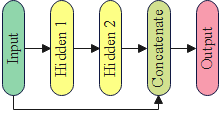

In [9]:
# --------------------------------------------------- Build the model --------------------------------------------------
input_ = keras.layers.Input(shape=x_train.shape[1:])               # Single input single output (SISO); Shape: Number of column
hidden_layer1 = keras.layers.Dense(50, activation="relu")(input_)
hidden_layer2 = keras.layers.Dense(10, activation="relu")(hidden_layer1)
concatenate_layer = keras.layers.Concatenate()([input_, hidden_layer2])
output = keras.layers.Dense(1)(concatenate_layer)
model = keras.Model(inputs=[input_], outputs=[output])

*Step 5. Compile Model*

In [10]:
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["mean_absolute_error"])

*Step 6: Fit, evaluate & predict Model*


In [11]:
history = model.fit(x_train_norm, y_train, epochs=30, validation_data=(x_validation_norm, y_validation))
history.params
history.history
model.summary()
weights, bias = model.layers[1].get_weights()

Epoch 1/30
363/363 [==============================] - 3s 4ms/step - loss: 1.0552 - mean_absolute_error: 0.6454 - val_loss: 2.8388 - val_mean_absolute_error: 0.9200
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 1.0047 - mean_absolute_error: 0.6220 - val_loss: 1.6789 - val_mean_absolute_error: 0.6523
Epoch 3/30
363/363 [==============================] - 2s 5ms/step - loss: 6.0160 - mean_absolute_error: 0.7033 - val_loss: 0.4467 - val_mean_absolute_error: 0.4956
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 47.5487 - mean_absolute_error: 1.5240 - val_loss: 1.8620 - val_mean_absolute_error: 0.9846
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 498743712.0000 - mean_absolute_error: 1185.6643 - val_loss: 999823.0625 - val_mean_absolute_error: 784.0743
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 354104.5625 - mean_absolute_error: 336.9096 - val_loss: 124550.6016 - val_mean_absolute

*Plot*

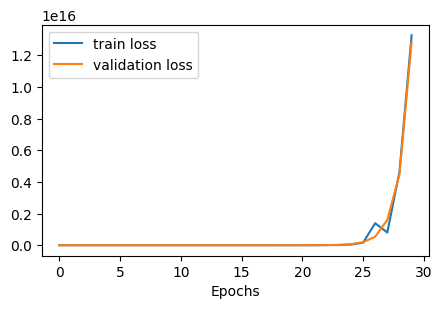

In [12]:
fig, axs = plt.subplots(figsize=(5, 3))
axs.plot(history.history["loss"], label="train loss")
axs.plot(history.history["val_loss"], label="validation loss")
axs.set_xlabel("Epochs")
axs.legend()

Method 2: Multi input single output (MISO)

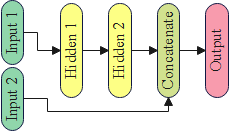

Epoch 1/30
363/363 [==============================] - 3s 6ms/step - loss: 0.6971 - mean_absolute_error: 0.5939 - val_loss: 0.4972 - val_mean_absolute_error: 0.5128
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4434 - mean_absolute_error: 0.4839 - val_loss: 0.4543 - val_mean_absolute_error: 0.4815
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4085 - mean_absolute_error: 0.4639 - val_loss: 0.4141 - val_mean_absolute_error: 0.4663
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3905 - mean_absolute_error: 0.4525 - val_loss: 0.4079 - val_mean_absolute_error: 0.4584
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3799 - mean_absolute_error: 0.4432 - val_loss: 0.4190 - val_mean_absolute_error: 0.4688
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3780 - mean_absolute_error: 0.4360 - val_loss: 0.4139 - val_mean_absolute_error: 0.4624
Epoch 7/30
363/3

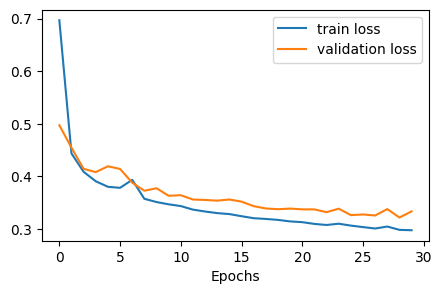

In [13]:
x_train_1, x_train_2 = x_train_norm[:, :8], x_train_norm[:, -2:]
x_validation_1, x_validation_2 = x_validation_norm[:, :8], x_validation_norm[:, -2:]
x_test_1, x_test_2 = x_test_norm[:, :8], x_test_norm[:, -2:]
# --------------------------------------------------- Build the model --------------------------------------------------
input_1 = keras.layers.Input(shape=[x_train_1.shape[1]])                    # Shape for first layer: 8 column
input_2 = keras.layers.Input(shape=[x_train_2.shape[1]])                    # Shape for second layer: 2 column
hidden_layer1 = keras.layers.Dense(50, activation="relu")(input_1)
hidden_layer2 = keras.layers.Dense(10, activation="relu")(hidden_layer1)
concatenate_layer = keras.layers.Concatenate()([input_2, hidden_layer2])
output = keras.layers.Dense(1)(concatenate_layer)
model = keras.Model(inputs=[input_1, input_2], outputs=[output])
# --------------------------------------------------- Compile Model ----------------------------------------------------
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["mean_absolute_error"])
# ------------------------------------------ Fit, evaluate & predictModel ----------------------------------------------
history = model.fit((x_train_1, x_train_2), y_train, epochs=30, validation_data=((x_validation_1, x_validation_2), y_validation))
history.params
history.history
model.summary()
weights, bias = model.layers[1].get_weights()
# ---------------------------------------------------------- Plot-------------------------------------------------------
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["val_loss"], label="validation loss")
ax.set_xlabel("Epochs")
ax.legend()

Method 3: Multi input Multi output (MISO)<br/>
[Model saving & loading](https://keras.io/api/saving/model_saving_and_loading/)

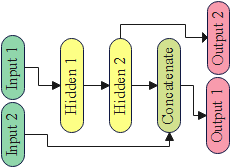

Epoch 1/30
363/363 [==============================] - 4s 4ms/step - loss: 0.7838 - output_1_loss: 0.7717 - output_2_loss: 0.8322 - output_1_mean_absolute_error: 0.6155 - output_2_mean_absolute_error: 0.6356 - val_loss: 0.6076 - val_output_1_loss: 0.5556 - val_output_2_loss: 0.8156 - val_output_1_mean_absolute_error: 0.5187 - val_output_2_mean_absolute_error: 0.5575
Epoch 2/30
363/363 [==============================] - 3s 8ms/step - loss: 0.4928 - output_1_loss: 0.4775 - output_2_loss: 0.5538 - output_1_mean_absolute_error: 0.4942 - output_2_mean_absolute_error: 0.5259 - val_loss: 0.5003 - val_output_1_loss: 0.4965 - val_output_2_loss: 0.5153 - val_output_1_mean_absolute_error: 0.4847 - val_output_2_mean_absolute_error: 0.4994
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4415 - output_1_loss: 0.4358 - output_2_loss: 0.4641 - output_1_mean_absolute_error: 0.4651 - output_2_mean_absolute_error: 0.4838 - val_loss: 0.4203 - val_output_1_loss: 0.4163 - val_outp

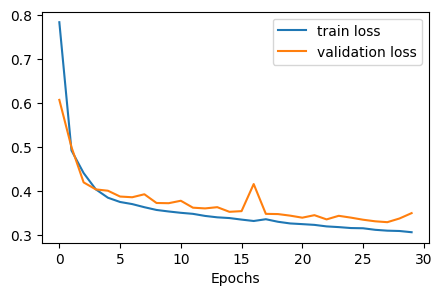

In [73]:
x_train_1, x_train_2 = x_train_norm[:, :8], x_train_norm[:, -2:]
x_validation_1, x_validation_2 = x_validation_norm[:, :8], x_validation_norm[:, -2:]
x_test_1, x_test_2 = x_test_norm[:, :8], x_test_norm[:, -2:]
# --------------------------------------------------- Build the model --------------------------------------------------
input_1 = keras.layers.Input(shape=[x_train_1.shape[1]])                    # Shape for first layer: 8 column
input_2 = keras.layers.Input(shape=[x_train_2.shape[1]])                    # Shape for second layer: 2 column
hidden_layer1 = keras.layers.Dense(50, activation="relu")(input_1)
hidden_layer2 = keras.layers.Dense(10, activation="relu")(hidden_layer1)
concatenate_layer = keras.layers.Concatenate()([input_2, hidden_layer2])
output_1 = keras.layers.Dense(1, name="output_1")(concatenate_layer)
output_2 = keras.layers.Dense(1, name="output_2")(hidden_layer2)
model = keras.Model(inputs=[input_1, input_2], outputs=[output_1, output_2])
# ----------------------------------------------------- Compile Model --------------------------------------------------
model.compile(loss=["mse", "mse"], loss_weights=[0.8, 0.2], optimizer="sgd",  # mse 1 for output_1: 0.8 more important from mse 2 for output_2
              metrics=["mean_absolute_error"])
# ---------------------------------------------- Fit, evaluate & predictModel ------------------------------------------
history = model.fit((x_train_1, x_train_2), (y_train, y_train), epochs=30,validation_data=((x_validation_1, x_validation_2),
                    (y_validation, y_validation)))
history.params
history.history
model.summary()
weights, bias = model.layers[1].get_weights()
# ---------------------------------------------------- Plot-------------------------------------------------------------
fig, axs = plt.subplots(figsize=(5, 3))
axs.plot(history.history["loss"], label="train loss")
axs.plot(history.history["val_loss"], label="validation loss")
axs.set_xlabel("Epochs")
axs.legend()
# --------------------------------------------------- Save model -------------------------------------------------------
# model.save("housing_reg_model_f.h5")
# model_reg = keras.models.load_model("housing_reg_model_f.h5")
# model_reg.summary()

*Subclass API*

Epoch 1/30
363/363 [==============================] - 3s 5ms/step - loss: 0.7465 - output_1_loss: 0.6937 - output_2_loss: 0.9580 - output_1_mean_absolute_error: 0.5909 - output_2_mean_absolute_error: 0.6969 - val_loss: 0.6175 - val_output_1_loss: 0.6221 - val_output_2_loss: 0.5992 - val_output_1_mean_absolute_error: 0.5335 - val_output_2_mean_absolute_error: 0.5752
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4962 - output_1_loss: 0.4874 - output_2_loss: 0.5314 - output_1_mean_absolute_error: 0.4930 - output_2_mean_absolute_error: 0.5302 - val_loss: 0.4673 - val_output_1_loss: 0.4544 - val_output_2_loss: 0.5190 - val_output_1_mean_absolute_error: 0.4762 - val_output_2_mean_absolute_error: 0.5016
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4400 - output_1_loss: 0.4336 - output_2_loss: 0.4657 - output_1_mean_absolute_error: 0.4726 - output_2_mean_absolute_error: 0.4878 - val_loss: 0.4258 - val_output_1_loss: 0.4188 - val_outp

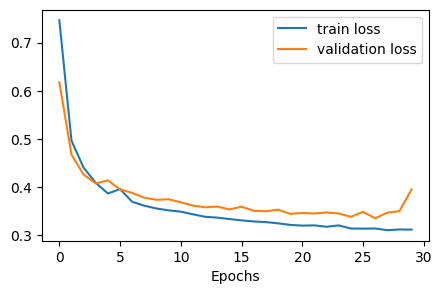

In [79]:
x_train_1, x_train_2 = x_train_norm[:, :8], x_train_norm[:, -2:]
x_validation_1, x_validation_2 = x_validation_norm[:, :8], x_validation_norm[:, -2:]
x_test_1, x_test_2 = x_test_norm[:, :8], x_test_norm[:, -2:]
# --------------------------------------------------- Build the model --------------------------------------------------
class wide_deep_mimo(keras.Model):
    def __init__(self, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden_layer_1 = keras.layers.Dense(50, activation=activation)
        self.hidden_layer_2 = keras.layers.Dense(10, activation=activation)
        self.final_output = keras.layers.Dense(1)
        self.helper_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_1, input_2 = inputs
        h1_out = self.hidden_layer_1(input_1)
        h2_out = self.hidden_layer_2(h1_out)
        concat_out = keras.layers.concatenate([input_2, h2_out])
        final_out = self.final_output(concat_out)
        helper_out = self.helper_output(h2_out)
        return final_out, helper_out

model = wide_deep_mimo()
# ----------------------------------------------------- Compile Model --------------------------------------------------
model.compile(loss=["mse", "mse"], loss_weights=[0.8, 0.2], optimizer="sgd",  # mse 1 for output_1: 0.8 more important from mse 2 for output_2
              metrics=["mean_absolute_error"])
# ---------------------------------------------- Fit, evaluate & predictModel ------------------------------------------
history = model.fit((x_train_1, x_train_2), (y_train, y_train), epochs=30,validation_data=((x_validation_1, x_validation_2),
                    (y_validation, y_validation)))
history.params
history.history
model.summary()
weights, bias = model.layers[1].get_weights()
# ---------------------------------------------------- Plot-------------------------------------------------------------
fig, axs = plt.subplots(figsize=(5, 3))
axs.plot(history.history["loss"], label="train loss")
axs.plot(history.history["val_loss"], label="validation loss")
axs.set_xlabel("Epochs")
axs.legend()